#### Note made during handover period: 
    
Before our changes to diag for planar geometries were merged into the main ccode, we were overriding it by placing a copy of `MAESTROeX/Source/Src_nd/diag.F90` (and also the C++ code) in the problem directory.

When we considered conservation of linear wave action, the fastest way to have a look was to just hack that code to record the relevant conserved quantities of action in place of kinetic energy (replace with the momentum related term) and internal energy (replace the entropy related term).

To repeat this, there would be no need to override the C++ anymore, but you'd need to bring `diag.F90` over and modify the quantity you are integrating

The code I used last time is in `lgw/experimental_override` for reference. You could take a up-to-date copy of `MAESTROeX/Source/Src_nd/diag.F90`, place it in the `lgw` for override at compile time, and make similar changes to that.

# First look at linear wave action conservation

For version of diag where "ke" is actually $\int u^2$ and "ie" is actually $\int s_1^2$

In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
#cat ../diag_vel.out

In [102]:
# read according to the headers
t, maxU, maxMach, ke, ge, ie, dt = np.loadtxt("../diag_vel.out", skiprows=1, unpack=True)

In [103]:
# give new names to be obvious
sterm = ie
uterm = ke

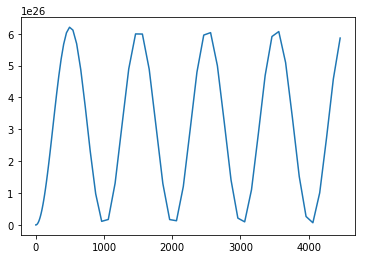

In [104]:
plt.plot(t,uterm)

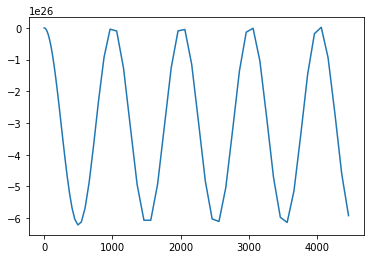

In [105]:
plt.plot(t,sterm-sterm[0])

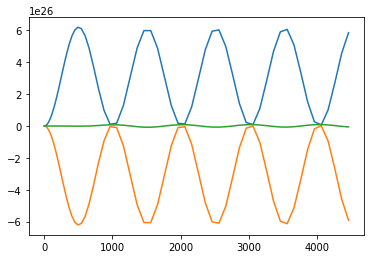

In [106]:
plt.plot(t,uterm,t,sterm-sterm[0],t,uterm + (sterm-sterm[0]))

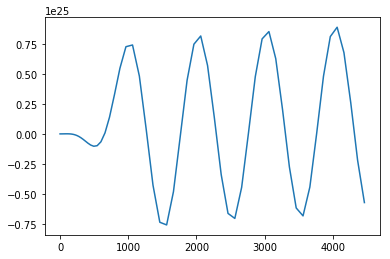

In [107]:
plt.plot(t,uterm + (sterm-sterm[0]))

In [98]:
max(uterm)

6.201495625119494e+26

In [99]:
max(sterm)

6.272155469564055e+26